## Network weights dependencies - Data Analysis

In [41]:
# Loading numpy/pandas/matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import math
import itertools

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [42]:
in_path = '/home/proprietaire/Documents/Workspace/Internships/Brandeis/Simulations/Outputs/Numerical/Network/paramSweep_110119.csv'
df = pd.read_csv(in_path)
df.shape

(56, 53)

In [43]:
df.head(5)

,ID,date,C_pre,C_post,delay_pre,theta_dep,gamma_dep,theta_pot,gamma_pot,tau_Ca,...,c,mode,finalMeanWExc,finalMeanWinh,finalG,finalFiringRate,meanWexc,meanWinh,stdWexc,stdWinh
0,1,11-Jan-2019,0.10,0.9,-0.015,1.0,200,1.2,70,0.08,...,1,rand,0.32045,-1.7536,5.4723,0,0.32045,-1.7536,0.12106,3.264100e-14
1,2,11-Jan-2019,0.20,0.9,-0.015,1.0,200,1.2,70,0.08,...,1,rand,0.31832,-1.7536,5.5088,0,0.31832,-1.7536,0.12323,3.264100e-14
2,3,11-Jan-2019,0.80,0.9,-0.015,1.0,200,1.2,70,0.08,...,1,rand,0.32072,-1.7536,5.4676,0,0.32072,-1.7536,0.12147,3.264100e-14
3,4,11-Jan-2019,0.84,0.9,-0.015,1.0,200,1.2,70,0.08,...,1,rand,0.32091,-1.7536,5.4644,0,0.32091,-1.7536,0.12304,3.264100e-14
4,5,11-Jan-2019,0.60,0.5,-0.015,1.0,200,1.2,70,0.08,...,1,rand,0.31930,-1.7536,5.4920,0,0.31930,-1.7536,0.12203,3.264100e-14


In [44]:
# First let's try some dimensionality reduction
df  = df[['C_pre','C_post','theta_pot','theta_dep','gamma_pot','gamma_dep','S_attr','J','rExtRel','N','Connectivity','NE','D','g','finalG','finalFiringRate','meanWexc','meanWinh','stdWexc','stdWinh']]
cols = df.columns.values
X_unfilt = df.as_matrix()
np.shape(X_unfilt)

(56, 20)

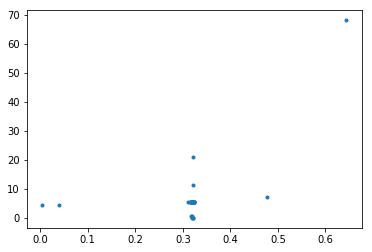

In [45]:
plt.plot(X_unfilt[:,16],X_unfilt[:,14],'.')

In [46]:
X = X_unfilt#[X_unfilt[:,1]<3]
X[:,17] = -X[:,17]
[N,d] = np.shape(X)

Linear regression has score 0.6690552444855152 
 Mean G: 3.780213021485188  
 Intercept: 0.0008963905833092034


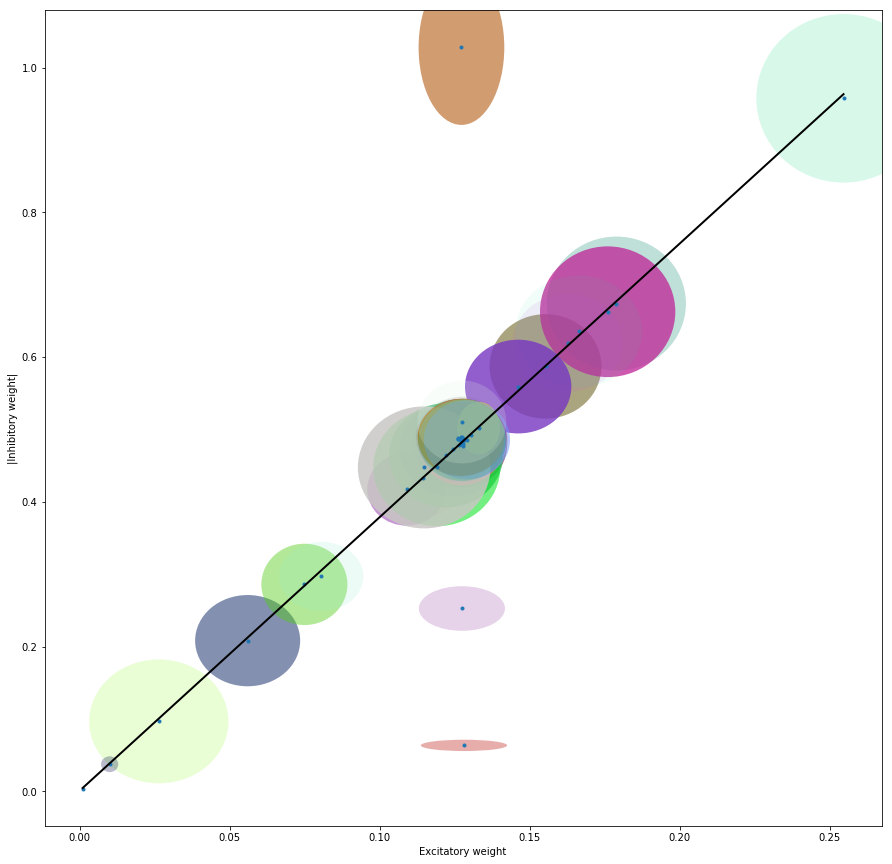

In [8]:
reg = LinearRegression().fit(X[:,16].reshape(-1, 1),X[:,17].reshape(-1, 1))
reg_coef = reg.coef_[0][0]
reg_intercept = reg.intercept_[0]
print('Linear regression has score {} \n Mean G: {}  \n Intercept: {}'.format(
    reg.score(X[:,16].reshape(-1, 1),X[:,17].reshape(-1, 1)),
    reg_coef,
    reg_intercept))

minWexc = min(X[:,16])
maxWexc = max(X[:,16])

# Plotting
ells = [Ellipse((X[k,16],X[k,17]), X[k,18], X[k,19]) for k in range(N)]
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(X[:,16],X[:,17],'.')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))
plt.xlabel('Excitatory weight')
plt.ylabel('|Inhibitory weight|')

# Linear regression (first guess, without filterring various G cases)
plt.plot([minWexc,maxWexc],[reg_intercept+reg_coef*minWexc,reg_intercept+reg_coef*maxWexc], 'k-', lw=2)

# Show plot
plt.show()

Linear regression has score 0.9984339124208955 
 Mean G: 3.7910949200665525  
 Intercept: 0.0015832690004717875
Linear regression has score 0.5941808263088887 
 Mean G: -890.5178735729925  
 Intercept: 114.06627109626619


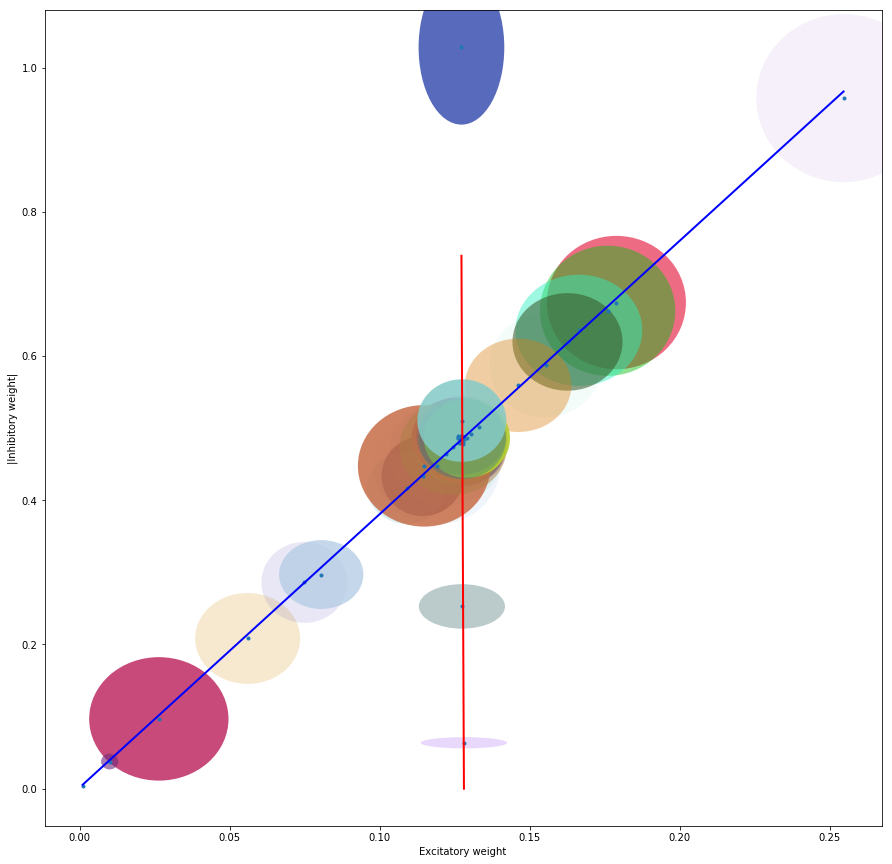

In [9]:
X_Gconst = X[abs(X[:,17] - reg_coef*X[:,16] - reg_intercept) < 0.08]
X_Gvar = X[abs(X[:,17] - reg_coef*X[:,16] - reg_intercept) >= 0.08]

# Second regression, having eliminated variable G
regGc = LinearRegression().fit(X_Gconst[:,16].reshape(-1, 1),X_Gconst[:,17].reshape(-1, 1))
regGc_coef = regGc.coef_[0][0]
regGc_intercept = regGc.intercept_[0]
print('Linear regression has score {} \n Mean G: {}  \n Intercept: {}'.format(
    regGc.score(X_Gconst[:,16].reshape(-1, 1),X_Gconst[:,17].reshape(-1, 1)),
    regGc_coef,
    regGc_intercept))

regGv = LinearRegression().fit(X_Gvar[:,16].reshape(-1, 1),X_Gvar[:,17].reshape(-1, 1))
regGv_coef = regGv.coef_[0][0]
regGv_intercept = regGv.intercept_[0]
print('Linear regression has score {} \n Mean G: {}  \n Intercept: {}'.format(
    regGv.score(X_Gvar[:,16].reshape(-1, 1),X_Gvar[:,17].reshape(-1, 1)),
    regGv_coef,
    regGv_intercept))

# Plotting
ells = [Ellipse((X[k,16],X[k,17]), X[k,18], X[k,19]) for k in range(N)]
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(X[:,16],X[:,17],'.')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))
plt.xlabel('Excitatory weight')
plt.ylabel('|Inhibitory weight|')

minWexcGv = min(X_Gvar[:,16])
maxWexcGv = max(X_Gvar[:,16])

# Linear regression (first guess, without filterring various G cases)
plt.plot([minWexc,maxWexc],[regGc_intercept+regGc_coef*minWexc,regGc_intercept+regGc_coef*maxWexc], 'b-', lw=2)
plt.plot([minWexcGv,maxWexcGv],[regGv_intercept+regGv_coef*minWexcGv,regGv_intercept+regGv_coef*maxWexcGv], 'r-', lw=2)

# Show plot
plt.show()

In [10]:
np.argwhere(abs(X[:,17] - reg_coef*X[:,16] - reg_intercept) >= 0.08)

array([[51],
       [52],
       [54]])

In [47]:
df2 = pd.DataFrame(data=X,
                   columns = cols) 

In [48]:
df2[-20:]

,C_pre,C_post,theta_pot,theta_dep,gamma_pot,gamma_dep,S_attr,J,rExtRel,N,Connectivity,NE,D,g,finalG,finalFiringRate,meanWexc,meanWinh,stdWexc,stdWinh
36,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,180.0,0.10,160.0,0.0030,80.0,5.627600,0.0,0.31160,1.753600,0.12665,7.549500e-15
37,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,200.0,0.10,160.0,0.0030,80.0,5.530300,0.0,0.31709,1.753600,0.12237,3.264100e-14
38,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,250.0,0.10,160.0,0.0030,80.0,5.445000,0.0,0.32205,1.753600,0.11862,6.350500e-14
39,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,300.0,0.10,160.0,0.0030,80.0,5.474300,0.0,0.32033,1.753600,0.12146,8.704100e-14
40,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,200.0,0.05,160.0,0.0030,80.0,5.425500,0.0,0.32321,1.753600,0.12034,1.199000e-14
41,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,200.0,0.10,160.0,0.0030,80.0,5.445000,0.0,0.32205,1.753600,0.12122,3.264100e-14
42,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,200.0,0.30,160.0,0.0030,80.0,5.455500,0.0,0.32143,1.753600,0.12032,5.817600e-14
43,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,200.0,0.70,160.0,0.0030,80.0,5.493500,0.0,0.31921,1.753600,0.12217,1.354500e-13
44,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,200.0,0.10,100.0,0.0030,80.0,5.535600,0.0,0.31678,1.753600,0.12425,4.973800e-14
45,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.2,4.0,200.0,0.10,140.0,0.0030,80.0,5.442600,0.0,0.32220,1.753600,0.11980,3.330700e-14


Now there seems to be a lot of data points around a single value of $\hat{W}_{exc}$ and $\hat{W}_{inh}$. <br>
Let's see if some parameters play on these final values, while other leave them invariant.

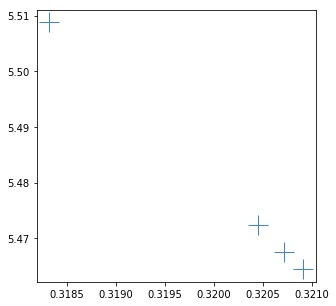

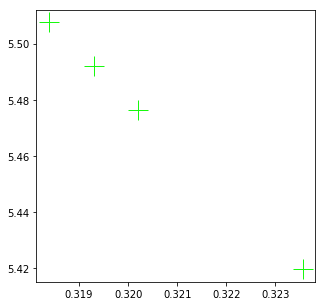

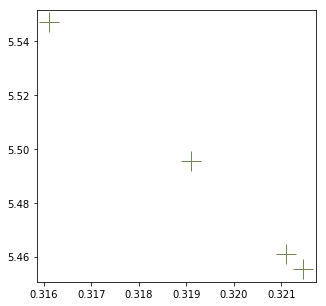

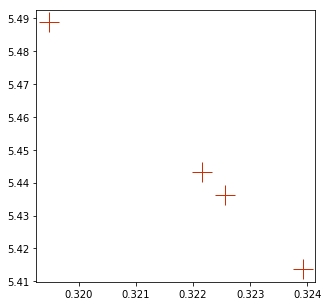

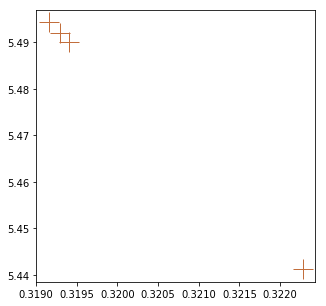

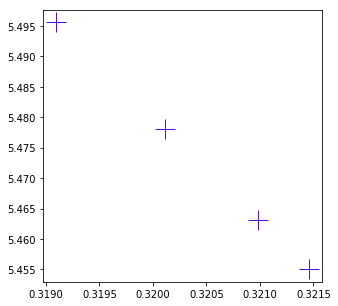

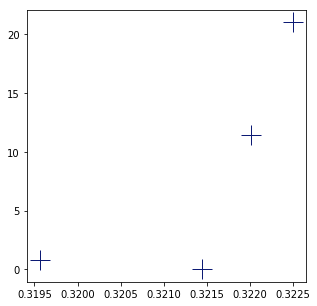

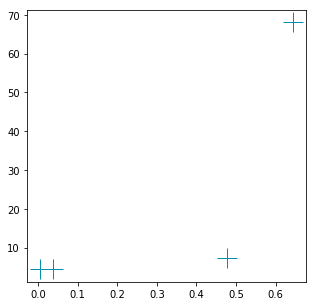

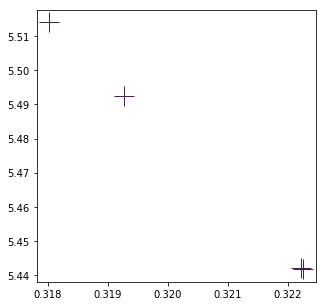

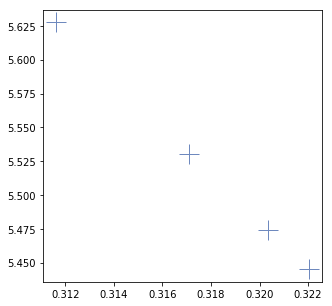

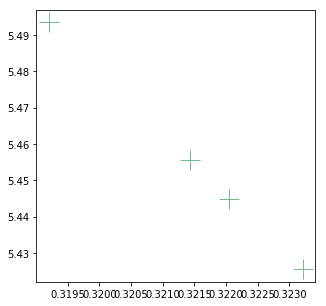

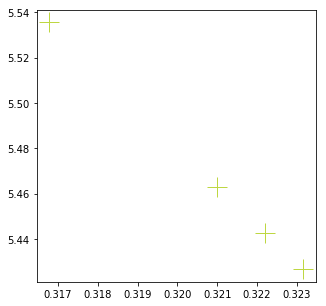

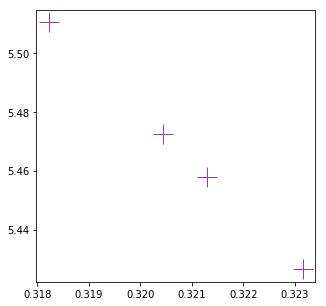

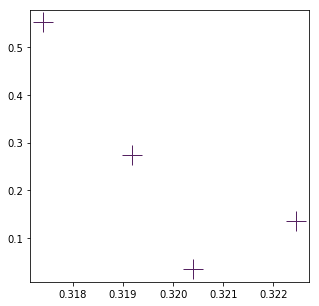

In [49]:
expsIDs = [range(k,k+4) for k in range(0,56,4)]
Nexps = len(expsIDs)
cols = np.random.rand(Nexps,3)

for k in range(Nexps):
    fig, ax = plt.subplots(figsize=(5,5))
    e = expsIDs[k]
    ax.plot(X[e,16],X[e,14],marker='+',color=cols[k,:],markersize=20,linestyle='None')
    #ax.set_xlim(0,0.25)
    #ax.set_ylim(0,1)
    plt.show()

In [50]:
varExpIDs = [6,7,13]
varIDs = [expsIDs[v][k] for v,k in itertools.product(varExpIDs, range(4))]
df2.iloc[varIDs]

,C_pre,C_post,theta_pot,theta_dep,gamma_pot,gamma_dep,S_attr,J,rExtRel,N,Connectivity,NE,D,g,finalG,finalFiringRate,meanWexc,meanWinh,stdWexc,stdWinh
24,0.6,0.9,1.2,1.0,70.0,200.0,20.0,0.200,4.0,200.0,0.1,160.0,0.003,80.0,21.021200,0.0,0.322500,6.779400,0.114860,3.286300e-14
25,0.6,0.9,1.2,1.0,70.0,200.0,30.0,0.200,4.0,200.0,0.1,160.0,0.003,80.0,11.435300,0.0,0.322010,3.682200,0.118870,4.840600e-14
26,0.6,0.9,1.2,1.0,70.0,200.0,60.0,0.200,4.0,200.0,0.1,160.0,0.003,80.0,0.820880,0.0,0.319560,0.262320,0.122130,2.664500e-15
27,0.6,0.9,1.2,1.0,70.0,200.0,100.0,0.200,4.0,200.0,0.1,160.0,0.003,80.0,0.003153,0.0,0.321440,0.001014,0.121780,2.168400e-19
28,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.002,4.0,200.0,0.1,160.0,0.003,80.0,4.387400,0.0,0.003997,0.017536,0.000087,1.526600e-16
29,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.020,4.0,200.0,0.1,160.0,0.003,80.0,4.481800,0.0,0.039126,0.175360,0.004765,5.551100e-16
30,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.400,4.0,200.0,0.1,160.0,0.003,80.0,7.355500,0.0,0.476810,3.507200,0.260460,6.528100e-14
31,0.6,0.9,1.2,1.0,70.0,200.0,40.0,5.000,4.0,200.0,0.1,160.0,0.003,80.0,68.060100,0.0,0.644130,43.839400,0.139500,5.187000e-13
52,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.200,4.0,200.0,0.1,160.0,0.003,0.5,0.034208,0.0,0.320390,0.010960,0.121380,3.469400e-17
53,0.6,0.9,1.2,1.0,70.0,200.0,40.0,0.200,4.0,200.0,0.1,160.0,0.003,2.0,0.135950,0.0,0.322460,0.043839,0.120750,1.387800e-16


The following factors DO NOT influence the final distribution of excitatory weights:
<br>
- $C_{pre}$
- $C_{post}$
- $\theta_{pot}$
- $\theta_{dep}$
- $rExtRel$
- $N$ (number of neurons)
- $c$ (random connectivity rate)
- $D$ (synaptic delay)

In [61]:
constExpIDs = [4,5,6,7]
constIDs = [expsIDs[v][k] for v,k in itertools.product(constExpIDs, range(4))]
df2.iloc[constIDs]

,C_pre,C_post,theta_pot,theta_dep,gamma_pot,gamma_dep,S_attr,J,rExtRel,N,Connectivity,NE,D,g,finalG,finalFiringRate,meanWexc,meanWinh,stdWexc,stdWinh
16,0.4,0.84,1.2,1.0,20.0,200.0,40.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.7649,100.0,0.055511,0.209000,0.035135,0.127960
17,0.4,0.84,1.2,1.0,60.0,200.0,40.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.8017,100.0,0.113800,0.432650,0.027161,0.102410
18,0.4,0.84,1.2,1.0,100.0,200.0,40.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.7282,100.0,0.155520,0.579800,0.036955,0.154960
19,0.4,0.84,1.2,1.0,200.0,200.0,40.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.7894,100.0,0.178460,0.676270,0.047034,0.182390
20,0.4,0.84,1.2,1.0,70.0,60.0,40.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.7703,100.0,0.175660,0.662300,0.045899,0.178760
21,0.4,0.84,1.2,1.0,70.0,100.0,40.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.8501,100.0,0.165570,0.637450,0.043069,0.151830
22,0.4,0.84,1.2,1.0,70.0,250.0,40.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.8258,100.0,0.109680,0.419620,0.025887,0.093749
23,0.4,0.84,1.2,1.0,70.0,400.0,40.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.7458,100.0,0.074779,0.280110,0.028423,0.103660
24,0.4,0.84,1.2,1.0,70.0,200.0,20.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.7715,100.0,0.162160,0.611580,0.037372,0.145440
25,0.4,0.84,1.2,1.0,70.0,200.0,30.0,0.200,2.0,200.0,0.1,160.0,0.003,3.8,3.8369,100.0,0.146790,0.563210,0.034745,0.121650


The following factors DO influence the final distribution of excitatory weights:
<br>
- $\gamma_{pot}$ (potentiation speed)
- $\gamma_{dep}$ (depression speed)
- $S_{attr}$ (basin of stability threshold in the pheno model of synaptic plasticity)
- $J$ (base synaptic strength) J can be interesting as it can make spiking easier or harder depending on its value relative to $V_t$. Considering that the threshold potential of neurons is both uniform and fixed.